In [1]:
#  imports 
import numpy as np
import pandas as pd
from math import sqrt 
from pprint import pprint
from numpy import array
from time import time

In [2]:
# load data
df=pd.read_csv('ALOI_norm.csv')  

del df['id']
del df['Unnamed: 0']
df['outlier'] = df.outlier.apply(lambda label: 1 if label == "'yes'" else 0)

df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att19,att20,att21,att22,att23,att24,att25,att26,att27,outlier
0,0.784999,0.000018,0.0,0.000093,0.0,0.0,0.0,0.0,0.0,0.139811,...,0.048171,0.001189,0.0,0.115728,0.023449,0.0002,0.000220,0.034952,0.046914,1
1,0.958088,0.000000,0.0,0.001671,0.0,0.0,0.0,0.0,0.0,0.019556,...,0.000000,0.000000,0.0,0.022035,0.007516,0.0000,0.000000,0.001033,0.000000,1
2,0.938768,0.000000,0.0,0.005146,0.0,0.0,0.0,0.0,0.0,0.018451,...,0.000000,0.000000,0.0,0.035542,0.011982,0.0000,0.001595,0.019520,0.000000,1
3,0.954775,0.000000,0.0,0.001427,0.0,0.0,0.0,0.0,0.0,0.024944,...,0.000000,0.000000,0.0,0.019941,0.000805,0.0000,0.000000,0.000035,0.000000,1
4,0.933601,0.000000,0.0,0.001682,0.0,0.0,0.0,0.0,0.0,0.037002,...,0.000000,0.000000,0.0,0.046759,0.002663,0.0000,0.000339,0.001359,0.000000,1


In [3]:
df.shape

(50000, 28)

In [4]:
# df to values
df = df.values

In [5]:
# CascadeExtraTrees
import argparse
import numpy as np
import sys
import pickle
from sklearn.metrics import accuracy_score
sys.path.insert(0, "lib")
from gcforest.gcforest import GCForest
from gcforest.utils.config_utils import load_json
config = load_json("./examples/aloi.json")  
gc = GCForest(config)

In [6]:
# train test
from sklearn.cross_validation import train_test_split
y = df[:,27]
X = df[:,0:27]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
# count class
len(np.unique(y_train))

2

In [8]:
  # X_enc is the concatenated predict_proba result of CascadeExtraTrees

X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
  

[ 2018-07-30 14:43:50,629][cascade_classifier.fit_transform] X_groups_train.shape=[(35000, 27)],y_train.shape=(35000,),X_groups_test.shape=[(15000, 27)],y_test.shape=(15000,)
[ 2018-07-30 14:43:50,633][cascade_classifier.fit_transform] group_dims=[27]
[ 2018-07-30 14:43:50,634][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 14:43:50,634][cascade_classifier.fit_transform] group_ends=[27]
[ 2018-07-30 14:43:50,635][cascade_classifier.fit_transform] X_train.shape=(35000, 27),X_test.shape=(15000, 27)
[ 2018-07-30 14:43:50,641][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(35000, 27), X_cur_test.shape=(15000, 27)
[ 2018-07-30 14:43:52,309][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.17%
[ 2018-07-30 14:43:54,097][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.29%
[ 2018-07-30 14:43:55,863][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estim

In [9]:
# predict
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-30 14:44:09,694][cascade_classifier.transform] X_groups_test.shape=[(15000, 27)]
[ 2018-07-30 14:44:09,696][cascade_classifier.transform] group_dims=[27]
[ 2018-07-30 14:44:09,699][cascade_classifier.transform] X_test.shape=(15000, 27)
[ 2018-07-30 14:44:09,700][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(15000, 27)


Test Accuracy of CascadeExtraTrees = 97.280000 %
[[14548     2]
 [  406    44]]


             precision    recall  f1-score   support

        0.0       0.97      1.00      0.99     14550
        1.0       0.96      0.10      0.18       450

avg / total       0.97      0.97      0.96     15000



In [10]:
#  predict_proba + Data 
X_test_enc = gc.transform(X_test)
X_train_enc = X_train_enc.reshape((X_train_enc.shape[0], -1))
X_test_enc = X_test_enc.reshape((X_test_enc.shape[0], -1))
X_train_origin = X_train.reshape((X_train.shape[0], -1))
X_test_origin = X_test.reshape((X_test.shape[0], -1))
X_train_enc = np.hstack((X_train_origin, X_train_enc))
X_test_enc = np.hstack((X_test_origin, X_test_enc))

[ 2018-07-30 14:44:12,409][cascade_classifier.transform] X_groups_test.shape=[(15000, 27)]
[ 2018-07-30 14:44:12,412][cascade_classifier.transform] group_dims=[27]
[ 2018-07-30 14:44:12,413][cascade_classifier.transform] X_test.shape=(15000, 27)
[ 2018-07-30 14:44:12,415][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(15000, 27)


In [11]:
# New data
X_train_new = X_train_enc
X_test_new  = X_test_enc

In [12]:
X_test_new.shape

(15000, 29)

In [13]:
X_train_new.shape

(35000, 29)

In [14]:
# CascadeExtraTrees
config = load_json("./examples/aloigc.json")  
gc = GCForest(config)

X_train=X_train_enc
X_test=X_test_enc 
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)

[ 2018-07-30 14:44:15,491][cascade_classifier.fit_transform] X_groups_train.shape=[(35000, 29)],y_train.shape=(35000,),X_groups_test.shape=[(15000, 29)],y_test.shape=(15000,)
[ 2018-07-30 14:44:15,497][cascade_classifier.fit_transform] group_dims=[29]
[ 2018-07-30 14:44:15,499][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 14:44:15,500][cascade_classifier.fit_transform] group_ends=[29]
[ 2018-07-30 14:44:15,501][cascade_classifier.fit_transform] X_train.shape=(35000, 29),X_test.shape=(15000, 29)
[ 2018-07-30 14:44:15,507][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(35000, 29), X_cur_test.shape=(15000, 29)
[ 2018-07-30 14:44:17,199][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.71%
[ 2018-07-30 14:44:19,044][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.94%
[ 2018-07-30 14:44:20,547][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estim

[ 2018-07-30 14:45:17,547][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_1.predict)=98.17%
[ 2018-07-30 14:45:19,273][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_2.predict)=97.71%
[ 2018-07-30 14:45:20,849][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_3.predict)=97.86%
[ 2018-07-30 14:45:22,325][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_4.predict)=97.80%
[ 2018-07-30 14:45:23,700][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_5.predict)=97.89%
[ 2018-07-30 14:45:25,088][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.86%
[ 2018-07-30 14:45:26,490][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=98.00%
[ 2018-07-30 14:45:27,875][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.69%


In [15]:
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-30 14:45:58,944][cascade_classifier.transform] X_groups_test.shape=[(15000, 29)]
[ 2018-07-30 14:45:58,947][cascade_classifier.transform] group_dims=[29]
[ 2018-07-30 14:45:58,948][cascade_classifier.transform] X_test.shape=(15000, 29)
[ 2018-07-30 14:45:58,951][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(15000, 29)
[ 2018-07-30 14:46:01,261][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cur_test.shape=(15000, 31)
[ 2018-07-30 14:46:03,725][cascade_classifier.transform] [layer=2] look_indexs=[0], X_cur_test.shape=(15000, 31)
[ 2018-07-30 14:46:06,184][cascade_classifier.transform] [layer=3] look_indexs=[0], X_cur_test.shape=(15000, 31)


Test Accuracy of CascadeExtraTrees = 98.020000 %
[[14508    42]
 [  255   195]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     14550
        1.0       0.82      0.43      0.57       450

avg / total       0.98      0.98      0.98     15000



In [16]:
# CascadeExtraTrees
def update(X_train,X_test):
    # update Estimators
    M = np.delete(X_train, (-1), axis=1)
    X_train= np.delete(M, (-1), axis=1)
    M = np.delete(X_test, (-1), axis=1)
    X_test = np.delete(M, (-1), axis=1)
    return X_train,X_test

def newdata(X_test_enc, X_train_enc):
    # Make Data + Estimators
    X_train_origin = X_train.reshape((X_train.shape[0], -1))
    X_test_origin = X_test.reshape((X_test.shape[0], -1))
    X_train_enc = np.hstack((X_train_origin, X_train_enc))
    X_test_enc = np.hstack((X_test_origin, X_test_enc))
    return X_test_enc, X_train_enc

Accuracy = []
def affiche():
    # predict
    y_pred = gc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100),"Layer :",i)
    Accuracy.append(round(acc*100 , 2))
    # Matrix de confusion
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print(classification_report(y_test,y_pred))   
    
    
# Deep
t = []
for i in range (20):
    t0 = time()
    X_train,X_test=update(X_train,X_test)
    X_test_enc, X_train_enc=newdata(X_test_enc, X_train_enc)

    X_train=X_train_enc
    X_test=X_test_enc 
    
    config = load_json("./examples/aloigc.json")  
    gc = GCForest(config)
    X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test) 
    tt = time() - t0
    affiche() 
    t.append(round(tt,2))
    print (" Time ",format(round(tt,3))," seconds")  

[ 2018-07-30 14:46:08,732][cascade_classifier.fit_transform] X_groups_train.shape=[(35000, 29)],y_train.shape=(35000,),X_groups_test.shape=[(15000, 29)],y_test.shape=(15000,)
[ 2018-07-30 14:46:08,737][cascade_classifier.fit_transform] group_dims=[29]
[ 2018-07-30 14:46:08,737][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 14:46:08,738][cascade_classifier.fit_transform] group_ends=[29]
[ 2018-07-30 14:46:08,739][cascade_classifier.fit_transform] X_train.shape=(35000, 29),X_test.shape=(15000, 29)
[ 2018-07-30 14:46:08,744][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(35000, 29), X_cur_test.shape=(15000, 29)
[ 2018-07-30 14:46:09,997][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.60%
[ 2018-07-30 14:46:11,510][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.86%
[ 2018-07-30 14:46:13,085][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estim

[ 2018-07-30 14:47:14,707][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_1.predict)=98.11%
[ 2018-07-30 14:47:16,183][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_2.predict)=97.74%
[ 2018-07-30 14:47:17,673][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_3.predict)=97.71%
[ 2018-07-30 14:47:19,042][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_4.predict)=97.80%
[ 2018-07-30 14:47:20,430][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_5.predict)=98.06%
[ 2018-07-30 14:47:21,976][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.80%
[ 2018-07-30 14:47:23,342][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.74%
[ 2018-07-30 14:47:24,707][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.77%


('Test Accuracy of CascadeExtraTrees = 97.993333 %', 'Layer :', 0)
[[14520    30]
 [  271   179]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     14550
        1.0       0.86      0.40      0.54       450

avg / total       0.98      0.98      0.98     15000

(' Time ', '106.043', ' seconds')


[ 2018-07-30 14:48:05,661][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.63%
[ 2018-07-30 14:48:07,236][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.74%
[ 2018-07-30 14:48:08,707][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.89%
[ 2018-07-30 14:48:10,214][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.89%
[ 2018-07-30 14:48:11,894][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.71%
[ 2018-07-30 14:48:13,375][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.83%
[ 2018-07-30 14:48:14,872][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.63%
[ 2018-07-30 14:48:16,341][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.71%


[ 2018-07-30 14:49:13,648][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.77%
[ 2018-07-30 14:49:15,006][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.89%
[ 2018-07-30 14:49:16,401][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.69%
[ 2018-07-30 14:49:17,868][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=97.63%
[ 2018-07-30 14:49:18,119][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.76%
[ 2018-07-30 14:49:18,120][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=98.00%
[ 2018-07-30 14:49:18,122][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.76%
[ 2018-07-30 14:49:18,123][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=98.00%
[ 2018-07-30 14:49:18,131][

('Test Accuracy of CascadeExtraTrees = 98.000000 %', 'Layer :', 1)
[[14523    27]
 [  273   177]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     14550
        1.0       0.87      0.39      0.54       450

avg / total       0.98      0.98      0.98     15000

(' Time ', '123.053', ' seconds')


[ 2018-07-30 14:50:21,060][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.54%
[ 2018-07-30 14:50:22,611][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.80%
[ 2018-07-30 14:50:24,082][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.91%
[ 2018-07-30 14:50:25,554][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.69%
[ 2018-07-30 14:50:27,022][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.60%
[ 2018-07-30 14:50:28,488][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.86%
[ 2018-07-30 14:50:29,952][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.54%
[ 2018-07-30 14:50:31,412][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.57%


[ 2018-07-30 14:51:32,180][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.69%
[ 2018-07-30 14:51:33,545][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.77%
[ 2018-07-30 14:51:35,024][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.63%
[ 2018-07-30 14:51:37,077][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=97.60%
[ 2018-07-30 14:51:37,422][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.67%
[ 2018-07-30 14:51:37,423][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.92%
[ 2018-07-30 14:51:37,429][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.67%
[ 2018-07-30 14:51:37,432][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.92%
[ 2018-07-30 14:51:37,436][

('Test Accuracy of CascadeExtraTrees = 97.873333 %', 'Layer :', 2)
[[14525    25]
 [  294   156]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     14550
        1.0       0.86      0.35      0.49       450

avg / total       0.98      0.98      0.97     15000

(' Time ', '77.855', ' seconds')


[ 2018-07-30 14:51:44,172][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.57%
[ 2018-07-30 14:51:45,889][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.63%
[ 2018-07-30 14:51:47,466][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.77%
[ 2018-07-30 14:51:49,047][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.69%
[ 2018-07-30 14:51:50,699][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.51%
[ 2018-07-30 14:51:52,463][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.86%
[ 2018-07-30 14:51:54,229][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.43%
[ 2018-07-30 14:51:55,817][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.69%


[ 2018-07-30 14:52:54,957][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.69%
[ 2018-07-30 14:52:56,444][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.77%
[ 2018-07-30 14:52:57,922][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.57%
[ 2018-07-30 14:52:59,397][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=97.57%
[ 2018-07-30 14:52:59,649][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.70%
[ 2018-07-30 14:52:59,650][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.77%
[ 2018-07-30 14:52:59,652][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.70%
[ 2018-07-30 14:52:59,653][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.77%
[ 2018-07-30 14:52:59,662][

('Test Accuracy of CascadeExtraTrees = 97.766667 %', 'Layer :', 3)
[[14533    17]
 [  318   132]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     14550
        1.0       0.89      0.29      0.44       450

avg / total       0.98      0.98      0.97     15000

(' Time ', '122.477', ' seconds')


[ 2018-07-30 14:53:58,746][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.57%
[ 2018-07-30 14:54:00,331][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.80%
[ 2018-07-30 14:54:02,139][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.63%
[ 2018-07-30 14:54:03,834][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.89%
[ 2018-07-30 14:54:05,387][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.43%
[ 2018-07-30 14:54:06,985][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.80%
[ 2018-07-30 14:54:08,652][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.26%
[ 2018-07-30 14:54:10,131][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.54%


[ 2018-07-30 14:55:10,790][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.40%
[ 2018-07-30 14:55:12,596][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.69%
[ 2018-07-30 14:55:13,957][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.57%
[ 2018-07-30 14:55:15,321][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=97.48%
[ 2018-07-30 14:55:15,569][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.61%
[ 2018-07-30 14:55:15,571][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.71%
[ 2018-07-30 14:55:15,572][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.61%
[ 2018-07-30 14:55:15,573][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.71%
[ 2018-07-30 14:55:15,574][

('Test Accuracy of CascadeExtraTrees = 97.760000 %', 'Layer :', 4)
[[14529    21]
 [  315   135]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     14550
        1.0       0.87      0.30      0.45       450

avg / total       0.98      0.98      0.97     15000

(' Time ', '78.162', ' seconds')


[ 2018-07-30 14:55:22,201][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.43%
[ 2018-07-30 14:55:24,249][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.69%
[ 2018-07-30 14:55:26,053][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.74%
[ 2018-07-30 14:55:27,625][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.80%
[ 2018-07-30 14:55:29,369][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.54%
[ 2018-07-30 14:55:31,334][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.83%
[ 2018-07-30 14:55:33,458][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.43%
[ 2018-07-30 14:55:34,951][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.37%


[ 2018-07-30 14:56:35,540][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.40%
[ 2018-07-30 14:56:37,078][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.74%
[ 2018-07-30 14:56:38,560][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.54%
[ 2018-07-30 14:56:40,046][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=97.48%
[ 2018-07-30 14:56:40,295][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.58%
[ 2018-07-30 14:56:40,296][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.76%
[ 2018-07-30 14:56:40,298][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.58%
[ 2018-07-30 14:56:40,299][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.76%
[ 2018-07-30 14:56:40,307][

[ 2018-07-30 14:57:43,389][cascade_classifier.calc_accuracy] Accuracy(layer_8 - train.classifier_average)=97.60%
[ 2018-07-30 14:57:43,389][cascade_classifier.calc_accuracy] Accuracy(layer_8 - test.classifier_average)=97.75%
[ 2018-07-30 14:57:43,390][cascade_classifier.fit_transform] [Result][Optimal Level Detected] opt_layer_num=6, accuracy_train=97.66%, accuracy_test=97.75%
[ 2018-07-30 14:57:43,427][cascade_classifier.transform] X_groups_test.shape=[(15000, 29)]
[ 2018-07-30 14:57:43,429][cascade_classifier.transform] group_dims=[29]
[ 2018-07-30 14:57:43,429][cascade_classifier.transform] X_test.shape=(15000, 29)
[ 2018-07-30 14:57:43,431][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(15000, 29)
[ 2018-07-30 14:57:45,909][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cur_test.shape=(15000, 31)
[ 2018-07-30 14:57:48,371][cascade_classifier.transform] [layer=2] look_indexs=[0], X_cur_test.shape=(15000, 31)
[ 2018-07-30 14:57:50,883][cascade_

('Test Accuracy of CascadeExtraTrees = 97.753333 %', 'Layer :', 5)
[[14532    18]
 [  319   131]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     14550
        1.0       0.88      0.29      0.44       450

avg / total       0.98      0.98      0.97     15000

(' Time ', '142.863', ' seconds')


[ 2018-07-30 14:57:59,694][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.29%
[ 2018-07-30 14:58:01,268][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.63%
[ 2018-07-30 14:58:02,818][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.66%
[ 2018-07-30 14:58:04,348][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.80%
[ 2018-07-30 14:58:06,031][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.43%
[ 2018-07-30 14:58:07,737][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.71%
[ 2018-07-30 14:58:09,224][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.29%
[ 2018-07-30 14:58:10,715][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.40%


[ 2018-07-30 14:59:09,838][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.37%
[ 2018-07-30 14:59:11,279][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.74%
[ 2018-07-30 14:59:12,762][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.60%
[ 2018-07-30 14:59:14,266][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=97.46%
[ 2018-07-30 14:59:14,519][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.57%
[ 2018-07-30 14:59:14,521][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.73%
[ 2018-07-30 14:59:14,522][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.57%
[ 2018-07-30 14:59:14,523][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.73%
[ 2018-07-30 14:59:14,531][

('Test Accuracy of CascadeExtraTrees = 97.793333 %', 'Layer :', 6)
[[14535    15]
 [  316   134]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     14550
        1.0       0.90      0.30      0.45       450

avg / total       0.98      0.98      0.97     15000

(' Time ', '105.895', ' seconds')


[ 2018-07-30 14:59:56,658][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.26%
[ 2018-07-30 14:59:58,192][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.66%
[ 2018-07-30 14:59:59,682][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.66%
[ 2018-07-30 15:00:01,272][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.91%
[ 2018-07-30 15:00:03,031][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.57%
[ 2018-07-30 15:00:04,503][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.63%
[ 2018-07-30 15:00:05,976][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.46%
[ 2018-07-30 15:00:07,567][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.26%


[ 2018-07-30 15:01:08,006][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.31%
[ 2018-07-30 15:01:09,612][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.66%
[ 2018-07-30 15:01:11,350][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.48%
[ 2018-07-30 15:01:13,189][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=97.51%
[ 2018-07-30 15:01:13,408][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.57%
[ 2018-07-30 15:01:13,409][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.78%
[ 2018-07-30 15:01:13,412][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.57%
[ 2018-07-30 15:01:13,414][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.78%
[ 2018-07-30 15:01:13,415][

('Test Accuracy of CascadeExtraTrees = 97.760000 %', 'Layer :', 7)
[[14535    15]
 [  321   129]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     14550
        1.0       0.90      0.29      0.43       450

avg / total       0.98      0.98      0.97     15000

(' Time ', '78.091', ' seconds')


[ 2018-07-30 15:01:19,824][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.26%
[ 2018-07-30 15:01:21,581][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.66%
[ 2018-07-30 15:01:23,474][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.66%
[ 2018-07-30 15:01:25,431][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.80%
[ 2018-07-30 15:01:27,194][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.60%
[ 2018-07-30 15:01:28,689][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.54%
[ 2018-07-30 15:01:30,300][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.31%
[ 2018-07-30 15:01:32,191][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.29%


[ 2018-07-30 15:02:34,839][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.37%
[ 2018-07-30 15:02:36,322][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.60%
[ 2018-07-30 15:02:37,800][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.54%
[ 2018-07-30 15:02:39,314][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=97.37%
[ 2018-07-30 15:02:39,563][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.53%
[ 2018-07-30 15:02:39,565][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.73%
[ 2018-07-30 15:02:39,566][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.53%
[ 2018-07-30 15:02:39,567][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.73%
[ 2018-07-30 15:02:39,575][

[ 2018-07-30 15:03:39,929][cascade_classifier.calc_accuracy] Accuracy(layer_8 - train.classifier_average)=97.59%
[ 2018-07-30 15:03:39,930][cascade_classifier.calc_accuracy] Accuracy(layer_8 - test.classifier_average)=97.66%
[ 2018-07-30 15:03:39,938][cascade_classifier.fit_transform] [layer=9] look_indexs=[0], X_cur_train.shape=(35000, 31), X_cur_test.shape=(15000, 31)
[ 2018-07-30 15:03:41,174][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_0.predict)=97.49%
[ 2018-07-30 15:03:42,686][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_1.predict)=97.43%
[ 2018-07-30 15:03:44,162][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_2.predict)=97.71%
[ 2018-07-30 15:03:45,674][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_3.predict)=97.63%
[ 2018-07-30 15:03:47,125][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_4.predict)=97.86%
[ 

[ 2018-07-30 15:04:47,641][kfold_wrapper.log_eval_metrics] Accuracy(layer_13 - estimator_0 - 10_folds.train_3.predict)=97.71%
[ 2018-07-30 15:04:49,762][kfold_wrapper.log_eval_metrics] Accuracy(layer_13 - estimator_0 - 10_folds.train_4.predict)=97.71%
[ 2018-07-30 15:04:51,756][kfold_wrapper.log_eval_metrics] Accuracy(layer_13 - estimator_0 - 10_folds.train_5.predict)=97.63%
[ 2018-07-30 15:04:53,847][kfold_wrapper.log_eval_metrics] Accuracy(layer_13 - estimator_0 - 10_folds.train_6.predict)=97.43%
[ 2018-07-30 15:04:55,301][kfold_wrapper.log_eval_metrics] Accuracy(layer_13 - estimator_0 - 10_folds.train_7.predict)=97.31%
[ 2018-07-30 15:04:56,812][kfold_wrapper.log_eval_metrics] Accuracy(layer_13 - estimator_0 - 10_folds.train_8.predict)=97.69%
[ 2018-07-30 15:04:58,316][kfold_wrapper.log_eval_metrics] Accuracy(layer_13 - estimator_0 - 10_folds.train_9.predict)=97.66%
[ 2018-07-30 15:04:58,573][kfold_wrapper.log_eval_metrics] Accuracy(layer_13 - estimator_0 - 10_folds.train_cv.predict

('Test Accuracy of CascadeExtraTrees = 97.753333 %', 'Layer :', 8)
[[14536    14]
 [  323   127]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     14550
        1.0       0.90      0.28      0.43       450

avg / total       0.98      0.98      0.97     15000

(' Time ', '220.105', ' seconds')


[ 2018-07-30 15:05:27,364][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.20%
[ 2018-07-30 15:05:29,055][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.57%
[ 2018-07-30 15:05:31,030][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.63%
[ 2018-07-30 15:05:32,826][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.86%
[ 2018-07-30 15:05:34,400][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.57%
[ 2018-07-30 15:05:35,860][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.60%
[ 2018-07-30 15:05:37,328][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.31%
[ 2018-07-30 15:05:38,804][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.31%


[ 2018-07-30 15:06:40,520][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.46%
[ 2018-07-30 15:06:42,029][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.66%
[ 2018-07-30 15:06:43,618][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.57%
[ 2018-07-30 15:06:45,123][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=97.54%
[ 2018-07-30 15:06:45,372][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.59%
[ 2018-07-30 15:06:45,373][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.69%
[ 2018-07-30 15:06:45,375][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.59%
[ 2018-07-30 15:06:45,376][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.69%
[ 2018-07-30 15:06:45,383][

('Test Accuracy of CascadeExtraTrees = 97.693333 %', 'Layer :', 9)
[[14536    14]
 [  332   118]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     14550
        1.0       0.89      0.26      0.41       450

avg / total       0.98      0.98      0.97     15000

(' Time ', '128.907', ' seconds')


[ 2018-07-30 15:07:48,663][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.20%
[ 2018-07-30 15:07:50,155][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.74%
[ 2018-07-30 15:07:51,624][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.63%
[ 2018-07-30 15:07:53,206][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.74%
[ 2018-07-30 15:07:54,672][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.49%
[ 2018-07-30 15:07:56,158][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.60%
[ 2018-07-30 15:07:57,628][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.37%
[ 2018-07-30 15:07:59,125][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.43%


[ 2018-07-30 15:08:58,063][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.40%
[ 2018-07-30 15:08:59,553][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.66%
[ 2018-07-30 15:09:01,059][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.43%
[ 2018-07-30 15:09:02,557][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=97.46%
[ 2018-07-30 15:09:02,815][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.52%
[ 2018-07-30 15:09:02,816][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.63%
[ 2018-07-30 15:09:02,818][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.52%
[ 2018-07-30 15:09:02,819][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.63%
[ 2018-07-30 15:09:02,820][

('Test Accuracy of CascadeExtraTrees = 97.660000 %', 'Layer :', 10)
[[14535    15]
 [  336   114]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     14550
        1.0       0.88      0.25      0.39       450

avg / total       0.97      0.98      0.97     15000

(' Time ', '75.45', ' seconds')


[ 2018-07-30 15:09:08,870][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.09%
[ 2018-07-30 15:09:10,531][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.69%
[ 2018-07-30 15:09:12,106][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.63%
[ 2018-07-30 15:09:13,624][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.77%
[ 2018-07-30 15:09:15,091][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.40%
[ 2018-07-30 15:09:16,558][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.69%
[ 2018-07-30 15:09:18,028][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.34%
[ 2018-07-30 15:09:19,492][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.34%


[ 2018-07-30 15:10:20,253][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.51%
[ 2018-07-30 15:10:22,346][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.63%
[ 2018-07-30 15:10:24,937][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.48%
[ 2018-07-30 15:10:27,341][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=97.46%
[ 2018-07-30 15:10:27,668][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.54%
[ 2018-07-30 15:10:27,672][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.63%
[ 2018-07-30 15:10:27,674][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.54%
[ 2018-07-30 15:10:27,676][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.63%
[ 2018-07-30 15:10:27,684][

('Test Accuracy of CascadeExtraTrees = 97.613333 %', 'Layer :', 11)
[[14538    12]
 [  346   104]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     14550
        1.0       0.90      0.23      0.37       450

avg / total       0.97      0.98      0.97     15000

(' Time ', '111.379', ' seconds')


[ 2018-07-30 15:11:09,943][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.17%
[ 2018-07-30 15:11:11,426][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.91%
[ 2018-07-30 15:11:12,896][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.60%
[ 2018-07-30 15:11:14,365][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.77%
[ 2018-07-30 15:11:15,851][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.54%
[ 2018-07-30 15:11:17,446][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.74%
[ 2018-07-30 15:11:18,928][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.31%
[ 2018-07-30 15:11:20,405][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.40%


[ 2018-07-30 15:12:24,338][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.60%
[ 2018-07-30 15:12:25,814][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.49%
[ 2018-07-30 15:12:27,296][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.51%
[ 2018-07-30 15:12:28,795][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=97.46%
[ 2018-07-30 15:12:29,044][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.56%
[ 2018-07-30 15:12:29,046][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.59%
[ 2018-07-30 15:12:29,048][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.56%
[ 2018-07-30 15:12:29,049][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.59%
[ 2018-07-30 15:12:29,057][

('Test Accuracy of CascadeExtraTrees = 97.593333 %', 'Layer :', 12)
[[14534    16]
 [  345   105]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     14550
        1.0       0.87      0.23      0.37       450

avg / total       0.97      0.98      0.97     15000

(' Time ', '95.318', ' seconds')


[ 2018-07-30 15:12:52,733][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.06%
[ 2018-07-30 15:12:54,217][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.71%
[ 2018-07-30 15:12:55,688][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.54%
[ 2018-07-30 15:12:57,161][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.63%
[ 2018-07-30 15:12:58,629][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.54%
[ 2018-07-30 15:13:00,100][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.71%
[ 2018-07-30 15:13:01,578][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.34%
[ 2018-07-30 15:13:03,047][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.43%


[ 2018-07-30 15:14:02,417][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.57%
[ 2018-07-30 15:14:03,956][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.63%
[ 2018-07-30 15:14:05,414][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.63%
[ 2018-07-30 15:14:07,004][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=97.40%
[ 2018-07-30 15:14:07,217][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.57%
[ 2018-07-30 15:14:07,219][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.63%
[ 2018-07-30 15:14:07,221][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.57%
[ 2018-07-30 15:14:07,222][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.63%
[ 2018-07-30 15:14:07,230][

[ 2018-07-30 15:15:06,796][cascade_classifier.calc_accuracy] Accuracy(layer_8 - train.classifier_average)=97.54%
[ 2018-07-30 15:15:06,797][cascade_classifier.calc_accuracy] Accuracy(layer_8 - test.classifier_average)=97.63%
[ 2018-07-30 15:15:06,798][cascade_classifier.fit_transform] [Result][Optimal Level Detected] opt_layer_num=6, accuracy_train=97.58%, accuracy_test=97.61%
[ 2018-07-30 15:15:06,840][cascade_classifier.transform] X_groups_test.shape=[(15000, 29)]
[ 2018-07-30 15:15:06,842][cascade_classifier.transform] group_dims=[29]
[ 2018-07-30 15:15:06,843][cascade_classifier.transform] X_test.shape=(15000, 29)
[ 2018-07-30 15:15:06,844][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(15000, 29)
[ 2018-07-30 15:15:09,025][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cur_test.shape=(15000, 31)
[ 2018-07-30 15:15:11,498][cascade_classifier.transform] [layer=2] look_indexs=[0], X_cur_test.shape=(15000, 31)
[ 2018-07-30 15:15:13,998][cascade_

('Test Accuracy of CascadeExtraTrees = 97.606667 %', 'Layer :', 13)
[[14539    11]
 [  348   102]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     14550
        1.0       0.90      0.23      0.36       450

avg / total       0.97      0.98      0.97     15000

(' Time ', '135.386', ' seconds')


[ 2018-07-30 15:15:22,775][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.12%
[ 2018-07-30 15:15:24,249][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.71%
[ 2018-07-30 15:15:25,741][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.46%
[ 2018-07-30 15:15:27,198][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.66%
[ 2018-07-30 15:15:28,661][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.54%
[ 2018-07-30 15:15:30,149][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.57%
[ 2018-07-30 15:15:31,617][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.34%
[ 2018-07-30 15:15:33,089][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.40%


[ 2018-07-30 15:16:31,560][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.46%
[ 2018-07-30 15:16:32,919][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.69%
[ 2018-07-30 15:16:34,438][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.51%
[ 2018-07-30 15:16:35,927][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=97.54%
[ 2018-07-30 15:16:36,180][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.53%
[ 2018-07-30 15:16:36,181][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.60%
[ 2018-07-30 15:16:36,183][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.53%
[ 2018-07-30 15:16:36,183][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.60%
[ 2018-07-30 15:16:36,191][

('Test Accuracy of CascadeExtraTrees = 97.646667 %', 'Layer :', 14)
[[14537    13]
 [  340   110]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     14550
        1.0       0.89      0.24      0.38       450

avg / total       0.97      0.98      0.97     15000

(' Time ', '89.532', ' seconds')


[ 2018-07-30 15:16:59,836][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.14%
[ 2018-07-30 15:17:01,333][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.63%
[ 2018-07-30 15:17:02,810][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.49%
[ 2018-07-30 15:17:04,390][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.57%
[ 2018-07-30 15:17:05,960][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.49%
[ 2018-07-30 15:17:07,503][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.46%
[ 2018-07-30 15:17:09,100][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.34%
[ 2018-07-30 15:17:10,685][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.40%


[ 2018-07-30 15:18:07,705][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.40%
[ 2018-07-30 15:18:09,327][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.46%
[ 2018-07-30 15:18:10,882][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.48%
[ 2018-07-30 15:18:12,427][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=97.46%
[ 2018-07-30 15:18:12,675][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.45%
[ 2018-07-30 15:18:12,676][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.59%
[ 2018-07-30 15:18:12,678][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.45%
[ 2018-07-30 15:18:12,679][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.59%
[ 2018-07-30 15:18:12,687][

('Test Accuracy of CascadeExtraTrees = 97.606667 %', 'Layer :', 15)
[[14536    14]
 [  345   105]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     14550
        1.0       0.88      0.23      0.37       450

avg / total       0.97      0.98      0.97     15000

(' Time ', '103.98', ' seconds')


[ 2018-07-30 15:18:53,722][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.03%
[ 2018-07-30 15:18:55,195][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.63%
[ 2018-07-30 15:18:56,669][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.66%
[ 2018-07-30 15:18:58,138][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.69%
[ 2018-07-30 15:18:59,603][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.37%
[ 2018-07-30 15:19:01,075][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.60%
[ 2018-07-30 15:19:02,588][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.31%
[ 2018-07-30 15:19:04,196][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.49%


[ 2018-07-30 15:19:55,743][cascade_classifier.fit_transform] X_train.shape=(35000, 29),X_test.shape=(15000, 29)
[ 2018-07-30 15:19:55,747][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(35000, 29), X_cur_test.shape=(15000, 29)


('Test Accuracy of CascadeExtraTrees = 97.593333 %', 'Layer :', 16)
[[14536    14]
 [  347   103]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     14550
        1.0       0.88      0.23      0.36       450

avg / total       0.97      0.98      0.97     15000

(' Time ', '60.872', ' seconds')


[ 2018-07-30 15:19:56,994][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.20%
[ 2018-07-30 15:19:58,470][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.57%
[ 2018-07-30 15:19:59,958][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.66%
[ 2018-07-30 15:20:01,420][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.57%
[ 2018-07-30 15:20:02,902][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.51%
[ 2018-07-30 15:20:04,471][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.51%
[ 2018-07-30 15:20:06,059][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.40%
[ 2018-07-30 15:20:07,774][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.49%


[ 2018-07-30 15:21:04,928][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.51%
[ 2018-07-30 15:21:06,473][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.63%
[ 2018-07-30 15:21:08,041][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.48%
[ 2018-07-30 15:21:09,704][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=97.48%
[ 2018-07-30 15:21:09,922][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.53%
[ 2018-07-30 15:21:09,923][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.47%
[ 2018-07-30 15:21:09,925][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.53%
[ 2018-07-30 15:21:09,925][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.47%
[ 2018-07-30 15:21:09,933][

('Test Accuracy of CascadeExtraTrees = 97.426667 %', 'Layer :', 17)
[[14522    28]
 [  358    92]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     14550
        1.0       0.77      0.20      0.32       450

avg / total       0.97      0.97      0.97     15000

(' Time ', '89.154', ' seconds')


[ 2018-07-30 15:21:33,615][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.06%
[ 2018-07-30 15:21:35,086][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.54%
[ 2018-07-30 15:21:36,546][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.66%
[ 2018-07-30 15:21:38,013][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.43%
[ 2018-07-30 15:21:39,490][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.51%
[ 2018-07-30 15:21:40,982][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.51%
[ 2018-07-30 15:21:42,448][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.29%
[ 2018-07-30 15:21:43,940][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.49%


[ 2018-07-30 15:22:42,929][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.63%
[ 2018-07-30 15:22:44,425][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.54%
[ 2018-07-30 15:22:45,909][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.40%
[ 2018-07-30 15:22:47,390][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=97.48%
[ 2018-07-30 15:22:47,644][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.53%
[ 2018-07-30 15:22:47,645][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.53%
[ 2018-07-30 15:22:47,647][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.53%
[ 2018-07-30 15:22:47,648][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.53%
[ 2018-07-30 15:22:47,656][

('Test Accuracy of CascadeExtraTrees = 97.526667 %', 'Layer :', 18)
[[14533    17]
 [  354    96]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     14550
        1.0       0.85      0.21      0.34       450

avg / total       0.97      0.98      0.97     15000

(' Time ', '120.683', ' seconds')


[ 2018-07-30 15:23:46,847][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.32%
[ 2018-07-30 15:23:48,304][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.71%
[ 2018-07-30 15:23:49,816][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.51%
[ 2018-07-30 15:23:51,320][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.63%
[ 2018-07-30 15:23:52,772][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.37%
[ 2018-07-30 15:23:54,274][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.37%
[ 2018-07-30 15:23:55,755][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.29%
[ 2018-07-30 15:23:57,225][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.46%


[ 2018-07-30 15:24:54,979][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.69%
[ 2018-07-30 15:24:56,452][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.60%
[ 2018-07-30 15:24:57,931][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=97.54%
[ 2018-07-30 15:24:59,423][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=97.37%
[ 2018-07-30 15:24:59,673][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=97.53%
[ 2018-07-30 15:24:59,675][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.52%
[ 2018-07-30 15:24:59,676][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=97.53%
[ 2018-07-30 15:24:59,677][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.52%
[ 2018-07-30 15:24:59,685][

[ 2018-07-30 15:26:00,383][cascade_classifier.calc_accuracy] Accuracy(layer_8 - train.classifier_average)=97.53%
[ 2018-07-30 15:26:00,384][cascade_classifier.calc_accuracy] Accuracy(layer_8 - test.classifier_average)=97.49%
[ 2018-07-30 15:26:00,391][cascade_classifier.fit_transform] [layer=9] look_indexs=[0], X_cur_train.shape=(35000, 31), X_cur_test.shape=(15000, 31)
[ 2018-07-30 15:26:01,666][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_0.predict)=97.57%
[ 2018-07-30 15:26:03,176][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_1.predict)=97.34%
[ 2018-07-30 15:26:04,681][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_2.predict)=97.51%
[ 2018-07-30 15:26:06,448][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_3.predict)=97.71%
[ 2018-07-30 15:26:08,033][kfold_wrapper.log_eval_metrics] Accuracy(layer_9 - estimator_0 - 10_folds.train_4.predict)=97.77%
[ 

('Test Accuracy of CascadeExtraTrees = 97.520000 %', 'Layer :', 19)
[[14532    18]
 [  354    96]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99     14550
        1.0       0.84      0.21      0.34       450

avg / total       0.97      0.98      0.97     15000

(' Time ', '165.543', ' seconds')


('Opt_Cascade_num =', 1, ' Accuracy =', 98.0, 'Time =', 229.09)


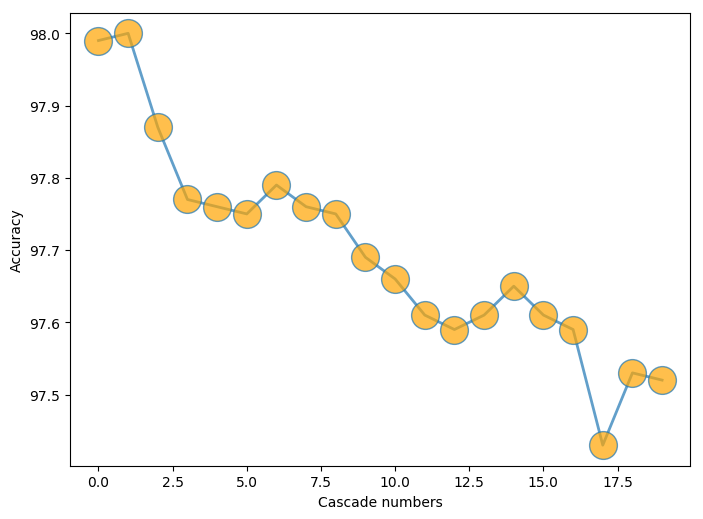

In [17]:
print ("Opt_Cascade_num =",Accuracy.index(max(Accuracy)), " Accuracy =", max(Accuracy) ,
       "Time =" , np.sum(t[0:Accuracy.index(max(Accuracy))+1]))

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.plot(Accuracy, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
plt.ylabel('Accuracy')
plt.xlabel('Cascade numbers')
plt.show()

In [18]:
Accuracy

[97.99,
 98.0,
 97.87,
 97.77,
 97.76,
 97.75,
 97.79,
 97.76,
 97.75,
 97.69,
 97.66,
 97.61,
 97.59,
 97.61,
 97.65,
 97.61,
 97.59,
 97.43,
 97.53,
 97.52]